<a href="https://colab.research.google.com/github/Aravind3991/PROJECT---CHENNAI-HOUSE-PRICE-PREDICTION/blob/main/Project_Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/train-chennai-sale.csv")

In [3]:
df.shape

(7109, 22)

In [4]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [5]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

# Dropping Non relevant Features

In [6]:
df1=df.drop(['PRT_ID','REG_FEE','COMMIS'], axis=1)

# Data Cleaning

In [7]:
df1.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [8]:
df1.loc[(df1.AREA == 'Adyr'),'AREA']='Adyar'
df1.loc[(df1.AREA == 'Velchery'),'AREA']='Velachery'
df1.loc[(df1.AREA == 'Ana Nagar'),'AREA']='Anna Nagar'
df1.loc[(df1.AREA == 'Ann Nagar'),'AREA']='Anna Nagar'
df1.loc[(df1.AREA == 'Karapakam'),'AREA']='Karapakkam'
df1.loc[(df1.AREA == 'Chrompt'),'AREA']='Chrompet'
df1.loc[(df1.AREA == 'Chrmpet'),'AREA']='Chrompet'
df1.loc[(df1.AREA == 'Chormpet'),'AREA']='Chrompet'
df1.loc[(df1.AREA == 'TNagar'),'AREA']='T Nagar'
df1.loc[(df1.AREA == 'KKNagar'),'AREA']='KK Nagar'

In [9]:
df1.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [10]:
df1.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [11]:
df1.loc[(df1.SALE_COND == 'Ab Normal'),'SALE_COND']='AbNormal'
df1.loc[(df1.SALE_COND == 'Partiall'),'SALE_COND']='Partial'
df1.loc[(df1.SALE_COND == 'PartiaLl'),'SALE_COND']='Partial'
df1.loc[(df1.SALE_COND == 'AdjLand'),'SALE_COND']='Adj Land'

In [12]:
df1.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [13]:
df1.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [14]:
df1.loc[(df1.PARK_FACIL == 'Noo'),'PARK_FACIL']='No'

In [15]:
df1.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df1.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [17]:
df1.loc[(df1.BUILDTYPE == 'Comercial'),'BUILDTYPE']='Commercial'
df1.loc[(df1.BUILDTYPE == 'Other'),'BUILDTYPE']='Others'

In [18]:
df1.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [19]:
df1.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [20]:
df1.loc[(df1.UTILITY_AVAIL == 'AllPub'),'UTILITY_AVAIL']='All Pub'
df1.loc[(df1.UTILITY_AVAIL == 'NoSewr '),'UTILITY_AVAIL']='NoSeWa'

In [21]:
df1.UTILITY_AVAIL.unique()

array(['All Pub', 'ELO', 'NoSeWa'], dtype=object)

In [22]:
df1.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [23]:
df1.loc[(df1.STREET == 'Pavd'),'STREET']='Paved'
df1.loc[(df1.STREET == 'NoAccess'),'STREET']='No Access'

In [24]:
df1.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [25]:
df1.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [26]:
df1.QS_ROOMS.unique()
#df1.QS_BATHROOM.unique() 
#df1.QS_BEDROOM.unique() 
#df1.QS_OVERALL.unique()

array([4. , 4.9, 4.1, 4.7, 3. , 4.5, 3.6, 2.4, 2.9, 3.1, 2.2, 2.1, 4.8,
       3.8, 2.3, 3.5, 4.6, 2.8, 4.2, 3.4, 2.7, 2. , 4.3, 3.9, 2.6, 3.3,
       2.5, 3.7, 3.2, 4.4, 5. ])

In [27]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [28]:
df1[df1['N_BEDROOM'].isnull()]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
4060,Anna Nagar,1556,16-01-2013,181,NaN,1.0,4,Partial,No,23-01-1986,House,NoSeWa,No Access,RM,4.8,2.7,2.0,3.155,10797790


In [29]:
df1.N_BEDROOM.unique()

array([ 1.,  2.,  3.,  4., nan])

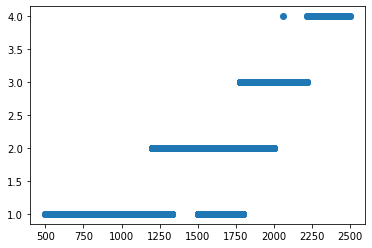

In [30]:
import matplotlib.pyplot as plt
plt.scatter(df1['INT_SQFT'], df1['N_BEDROOM'])
plt.show()

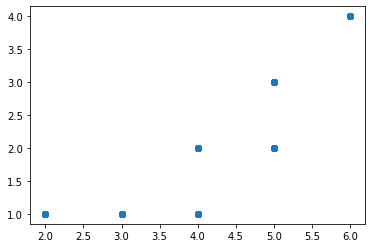

In [31]:
import matplotlib.pyplot as plt
plt.scatter(df1['N_ROOM'], df1['N_BEDROOM'])
plt.show()

In [32]:
num = df1['N_BEDROOM'].mode()[0]
df1['N_BEDROOM'].fillna(num, inplace=True)

In [33]:
df1.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [34]:
df1[df1['N_BATHROOM'].isnull()]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
70,Anna Nagar,1589,22-03-2010,39,1.0,NaN,4,Partial,No,02-04-1966,Others,All Pub,Gravel,RL,2.1,2.5,4.5,3.16,12212350
5087,Chrompet,1016,02-08-2012,105,1.0,NaN,3,AbNormal,Yes,10-08-1980,Others,NoSeWa,Gravel,RM,3.2,4.2,2.0,3.24,10647920
6134,Chrompet,916,02-08-2012,173,1.0,NaN,3,Normal Sale,Yes,12-08-1974,Others,ELO,Paved,RL,3.4,3.5,3.0,NaN,8847420
6371,Chrompet,1035,06-11-2012,90,1.0,NaN,3,Partial,No,14-11-1981,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,8274200
6535,Anna Nagar,1864,05-03-2007,184,2.0,NaN,5,Family,Yes,07-03-1997,Others,NoSeWa,Paved,RM,3.3,3.7,4.7,3.96,15556920


In [35]:
df1.N_BATHROOM.unique()

array([ 1.,  2., nan])

In [36]:
num1 = df1['N_BATHROOM'].mode()[0]
num1

1.0

In [37]:
df1['N_BATHROOM'].fillna(num1, inplace=True)

In [38]:
df1.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

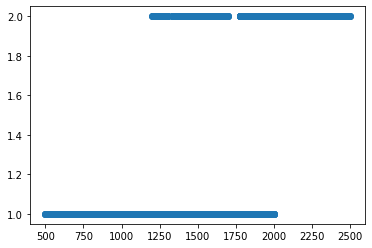

In [39]:
import matplotlib.pyplot as plt
plt.scatter(df['INT_SQFT'], df['N_BATHROOM'])
plt.show()

In [40]:
#df1.at[[70,6535],'N_BATHROOM']=2

In [41]:
#df1.at[[5087,6134,6371],'N_BATHROOM']=1

In [42]:
df1.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [43]:
df1[df1['QS_OVERALL'].isnull()]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
15,Velachery,1868,12-09-2009,148,3.0,2.0,5,Family,No,14-09-2000,Commercial,NoSeWa,Gravel,RH,3.8,3.8,3.1,NaN,15714080
46,T Nagar,1882,18-11-2006,189,2.0,1.0,5,AbNormal,Yes,23-11-1985,Others,ELO,Gravel,RM,3.9,4.5,4.7,NaN,16051580
86,Chrompet,1085,19-01-2014,149,1.0,1.0,3,AbNormal,Yes,21-01-2008,Commercial,NoSeWa,Gravel,RL,2.8,3.8,4.6,NaN,14363500
111,Adyar,1034,30-05-2009,73,1.0,1.0,3,Adj Land,Yes,03-06-1993,Others,ELO,Gravel,C,3.8,3.3,3.5,NaN,9256740
134,T Nagar,1942,20-12-2014,10,2.0,1.0,5,Family,No,29-12-1977,House,NoSeWa,Gravel,RH,4.6,3.1,2.9,NaN,12330740
143,Karapakkam,1430,02-10-2009,17,2.0,2.0,4,AbNormal,Yes,05-10-1999,Others,NoSeWa,No Access,A,4.3,3.2,3.8,NaN,6635750
161,Velachery,1824,03-04-2009,187,3.0,2.0,5,Normal Sale,No,11-04-1976,House,NoSeWa,Paved,I,3.9,2.3,4.1,NaN,8549060
186,Adyar,738,02-09-2007,69,1.0,1.0,2,Partial,No,06-09-1989,Commercial,NoSeWa,No Access,I,2.4,4.7,5.0,NaN,8312670
208,Karapakkam,1578,18-04-2011,153,2.0,2.0,4,Normal Sale,Yes,21-04-1998,Others,All Pub,Gravel,I,4.3,4.6,3.4,NaN,9532500
248,Velachery,1776,09-06-2010,120,2.0,1.0,4,Normal Sale,Yes,14-06-1989,House,NoSeWa,Paved,RH,4.9,2.4,3.4,NaN,9989170


In [44]:
df1.QS_OVERALL.unique()

array([4.33 , 3.765, 3.09 , 4.01 , 3.29 , 3.32 , 2.67 , 3.26 , 3.55 ,
       3.16 , 3.83 , 2.89 , 2.26 , 3.19 , 3.66 ,   nan, 3.57 , 4.3  ,
       3.35 , 4.76 , 3.39 , 3.43 , 3.73 , 3.59 , 3.74 , 2.29 , 3.17 ,
       4.18 , 2.755, 2.11 , 2.605, 4.58 , 4.2  , 3.27 , 4.19 , 2.98 ,
       3.12 , 3.08 , 3.85 , 3.42 , 3.2  , 4.   , 3.34 , 2.825, 3.46 ,
       4.07 , 3.68 , 2.95 , 3.505, 2.97 , 3.63 , 3.76 , 3.77 , 2.78 ,
       3.985, 3.04 , 2.88 , 4.21 , 2.42 , 3.8  , 2.54 , 3.84 , 2.395,
       3.14 , 2.49 , 3.175, 2.84 , 4.17 , 3.13 , 3.98 , 3.36 , 3.735,
       2.62 , 4.61 , 2.6  , 4.09 , 3.18 , 3.425, 3.71 , 3.21 , 3.61 ,
       2.9  , 3.94 , 4.145, 4.26 , 4.16 , 3.5  , 3.22 , 3.99 , 4.12 ,
       2.475, 2.28 , 2.725, 4.03 , 3.07 , 2.81 , 3.45 , 3.9  , 3.87 ,
       3.1  , 2.93 , 3.05 , 3.54 , 2.63 , 3.11 , 3.89 , 3.33 , 3.96 ,
       3.56 , 4.39 , 3.58 , 3.47 , 3.88 , 4.04 , 3.6  , 4.53 , 3.72 ,
       2.96 , 3.4  , 3.51 , 4.215, 3.055, 3.06 , 3.53 , 3.435, 3.41 ,
       3.86 , 3.62 ,

In [45]:
num2 = df1['QS_OVERALL'].mode()[0]
num2

3.54

In [46]:
df1['QS_OVERALL'].fillna(num2, inplace=True)

In [47]:
df1.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

In [48]:
df1.shape

(7109, 19)

In [49]:
df1.drop_duplicates

<bound method DataFrame.drop_duplicates of             AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0     Karapakkam      1004  04-05-2011            131        1.0         1.0   
1     Anna Nagar      1986  19-12-2006             26        2.0         1.0   
2          Adyar       909  04-02-2012             70        1.0         1.0   
3      Velachery      1855  13-03-2010             14        3.0         2.0   
4     Karapakkam      1226  05-10-2009             84        1.0         1.0   
...          ...       ...         ...            ...        ...         ...   
7104  Karapakkam       598  03-01-2011             51        1.0         1.0   
7105   Velachery      1897  08-04-2004             52        3.0         2.0   
7106   Velachery      1614  25-08-2006            152        2.0         1.0   
7107  Karapakkam       787  03-08-2009             40        1.0         1.0   
7108   Velachery      1896  13-07-2005            156        3.0         2.0 

In [50]:
df1.shape

(7109, 19)

In [51]:
df1['DATE_SALE']= pd.to_datetime(df1['DATE_SALE'])

In [52]:
df1['DATE_BUILD']= pd.to_datetime(df1['DATE_BUILD'])

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   float64       
 5   N_BATHROOM     7109 non-null   float64       
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

In [54]:
df1.N_BEDROOM=df1.N_BEDROOM.convert_dtypes(convert_floating=True)

In [55]:
df1.N_BATHROOM =df1.N_BATHROOM .convert_dtypes(convert_floating=True)

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   Int64         
 5   N_BATHROOM     7109 non-null   Int64         
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

In [57]:
df1.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [58]:
df1

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-03-01,51,1,1,2,Adj Land,No,1962-01-15,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000
7105,Velachery,1897,2004-08-04,52,3,2,5,Family,Yes,1995-11-04,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480
7106,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,No,1978-01-09,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410
7107,Karapakkam,787,2009-03-08,40,1,1,2,Partial,Yes,1977-11-08,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000


In [59]:
df1

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-03-01,51,1,1,2,Adj Land,No,1962-01-15,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000
7105,Velachery,1897,2004-08-04,52,3,2,5,Family,Yes,1995-11-04,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480
7106,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,No,1978-01-09,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410
7107,Karapakkam,787,2009-03-08,40,1,1,2,Partial,Yes,1977-11-08,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000


In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   Int64         
 5   N_BATHROOM     7109 non-null   Int64         
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

(array([ 339.,  962., 1040., 1045.,  421., 1270., 1087.,  597.,  164.,
         184.]),
 array([ 500.,  700.,  900., 1100., 1300., 1500., 1700., 1900., 2100.,
        2300., 2500.]),
 <a list of 10 Patch objects>)

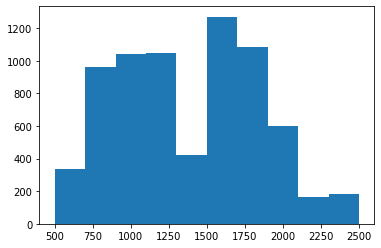

In [61]:
plt.hist(df1.INT_SQFT)

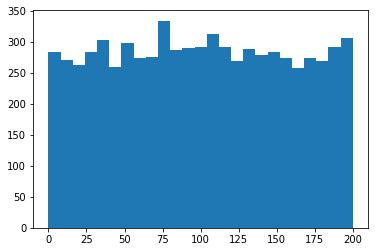

In [62]:
plt.hist(df1.DIST_MAINROAD,bins=25);

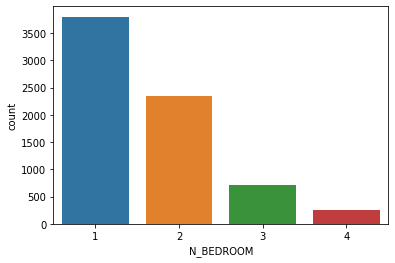

In [63]:
sns.countplot(x="N_BEDROOM",data=df1)

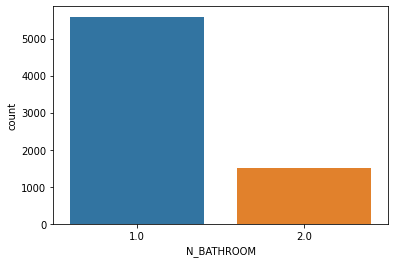

In [64]:
sns.countplot(x="N_BATHROOM",data=df);

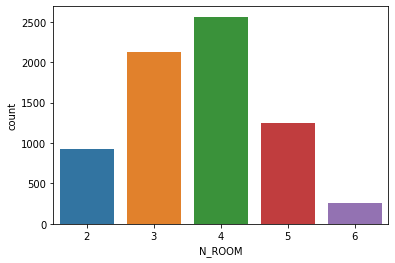

In [65]:
sns.countplot(x="N_ROOM",data=df1);

In [66]:
df1.N_ROOM=df1.N_ROOM.convert_dtypes(convert_floating=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [68]:
df1.drop_duplicates(inplace=True)

In [69]:
df1.duplicated().unique()

array([False])

In [70]:
df1.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [71]:
df1.DATE_BUILD

0      1967-05-15
1      1995-12-22
2      1992-09-02
3      1988-03-18
4      1979-10-13
          ...    
7104   1962-01-15
7105   1995-11-04
7106   1978-01-09
7107   1977-11-08
7108   1961-07-24
Name: DATE_BUILD, Length: 7109, dtype: datetime64[ns]

In [72]:
yr=pd.DatetimeIndex(df1.DATE_BUILD).year

In [73]:
yr

Int64Index([1967, 1995, 1992, 1988, 1979, 2009, 1979, 1996, 1977, 1991,
            ...
            1971, 1985, 1974, 1990, 1986, 1962, 1995, 1978, 1977, 1961],
           dtype='int64', name='DATE_BUILD', length=7109)

In [74]:
yr.value_counts()

1985    200
1988    197
2002    194
1990    191
1999    189
       ... 
1954     11
2010      9
1951      6
1949      2
1950      2
Name: DATE_BUILD, Length: 62, dtype: int64

In [75]:
df.groupby(pd.DatetimeIndex(df.DATE_BUILD).year)["SALES_PRICE"].mean()

DATE_BUILD
1949    1.288525e+07
1950    6.761640e+06
1951    9.470893e+06
1952    9.603261e+06
1953    9.387892e+06
            ...     
2006    1.094184e+07
2007    1.124737e+07
2008    1.274462e+07
2009    1.320975e+07
2010    1.002291e+07
Name: SALES_PRICE, Length: 62, dtype: float64

In [76]:
df.groupby(pd.DatetimeIndex(df.DATE_BUILD).year)["SALES_PRICE"].mean().reset_index()

,DATE_BUILD,SALES_PRICE
0,1949,1.288525e+07
1,1950,6.761640e+06
2,1951,9.470893e+06
3,1952,9.603261e+06
4,1953,9.387892e+06
...,...,...
57,2006,1.094184e+07
58,2007,1.124737e+07
59,2008,1.274462e+07
60,2009,1.320975e+07


In [77]:
df.groupby(pd.DatetimeIndex(df.DATE_BUILD).year)["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")

,DATE_BUILD,SALES_PRICE
1,1950,6.761640e+06
11,1960,7.967706e+06
13,1962,8.801768e+06
12,1961,8.846287e+06
14,1963,9.170291e+06
...,...,...
52,2001,1.158360e+07
47,1996,1.166618e+07
59,2008,1.274462e+07
0,1949,1.288525e+07


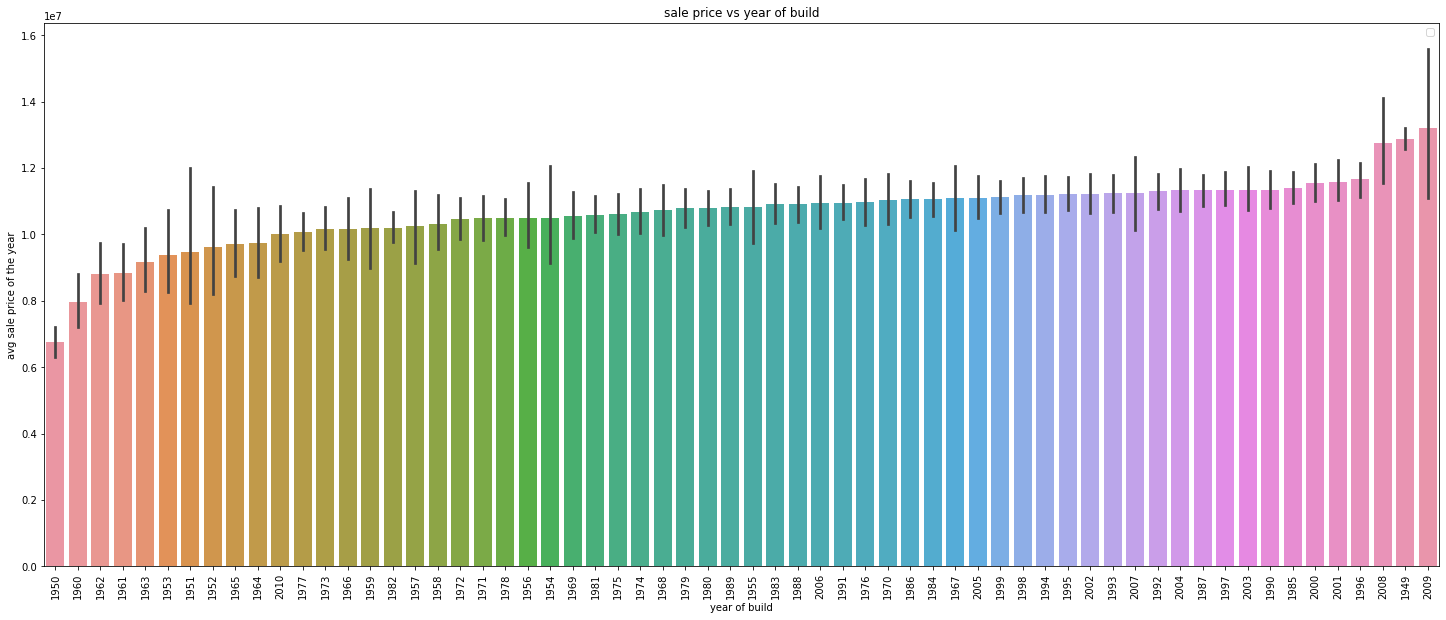

In [78]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(10)
sns.barplot(data=df,x=pd.DatetimeIndex(df.DATE_BUILD).year,y='SALES_PRICE',order=df.groupby(pd.DatetimeIndex(df.DATE_BUILD).year)["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")['DATE_BUILD'])
plt.xlabel("year of build")
plt.ylabel("avg sale price of the year")
plt.title("sale price vs year of build")
plt.legend()
plt.xticks(rotation=90)
plt.show()


In [79]:
def days(x):
  d=pd.Timestamp.today()-x
  return d.days

In [80]:
df1.DATE_BUILD=df1['DATE_BUILD'].apply(days)

In [81]:
df1.DATE_SALE=df1['DATE_SALE'].apply(days)

In [82]:
df1.DATE_SALE

0       4196
1       5764
2       3833
3       4584
4       4891
        ... 
7104    4231
7105    6631
7106    5880
7107    4954
7108    6288
Name: DATE_SALE, Length: 7109, dtype: int64

#Cleaned Dataframe

In [83]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# EDA - Categorical Feature

In [84]:
df1.select_dtypes(include=['object']).columns

Index(['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE'],
      dtype='object')

In [85]:
def countplot(dframe,col):
  f = plt.figure()
  f.set_figwidth(10)
  f.set_figheight(6)
  sns.countplot(data=dframe,x=col,label="count")
  plt.xlabel(col)
  plt.ylabel("COUNT")
  plt.title(col+" VS  COUNT")
  plt.legend()
  plt.xticks(rotation=20)
  return plt.show()

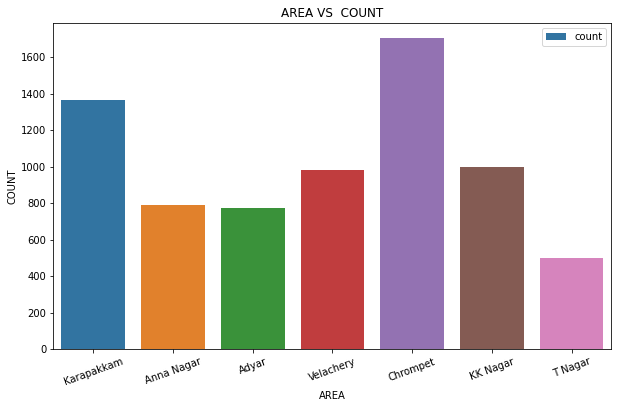

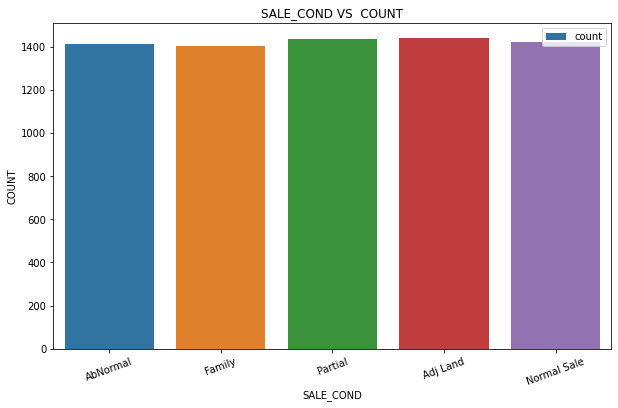

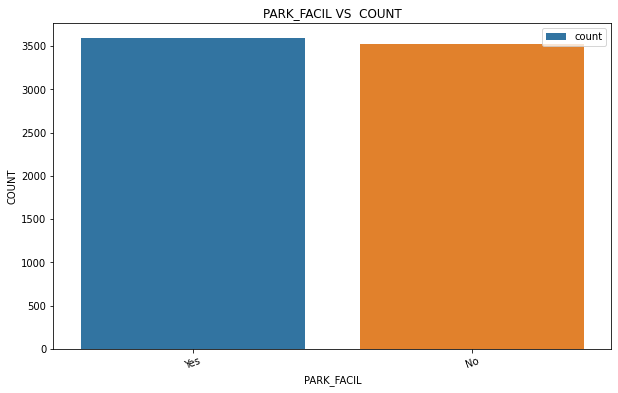

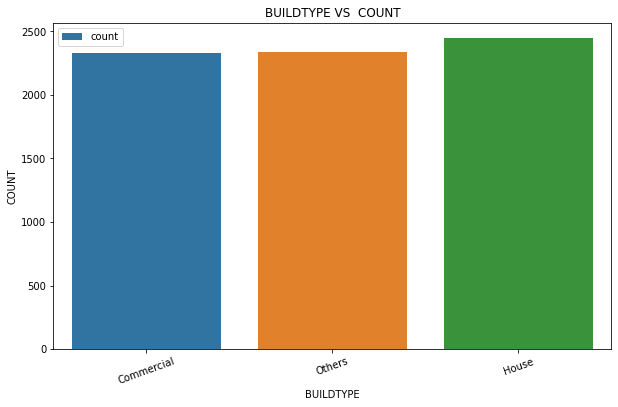

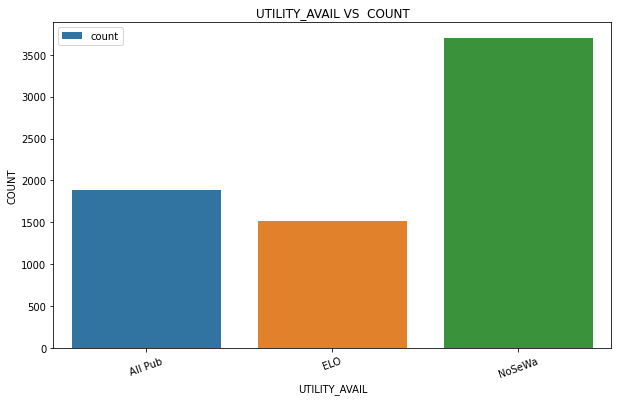

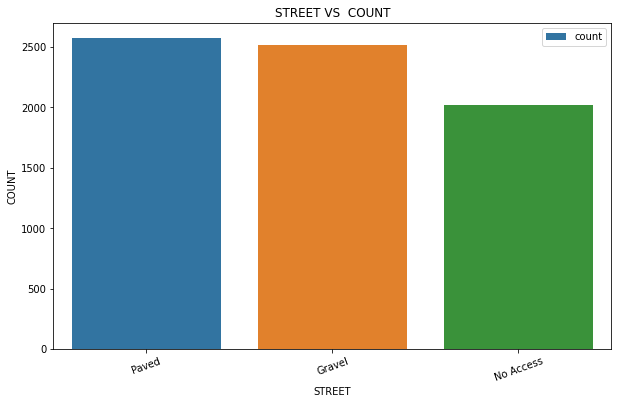

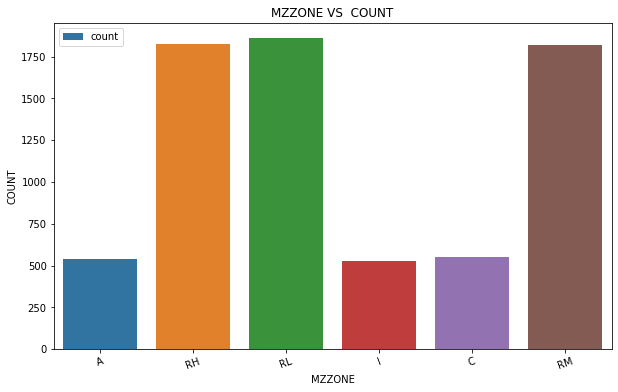

In [86]:
for x in df1.select_dtypes(include=['object']).columns:
   countplot(df1,x)
   print("\n")

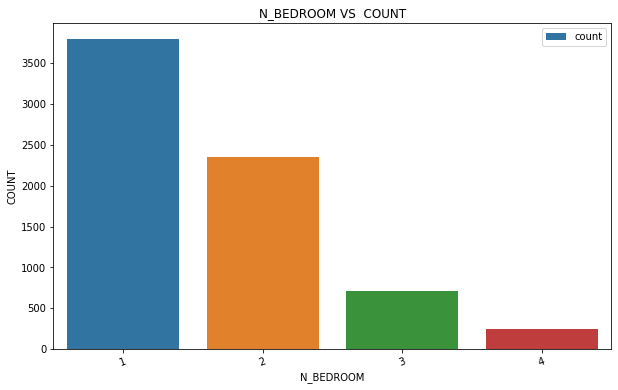

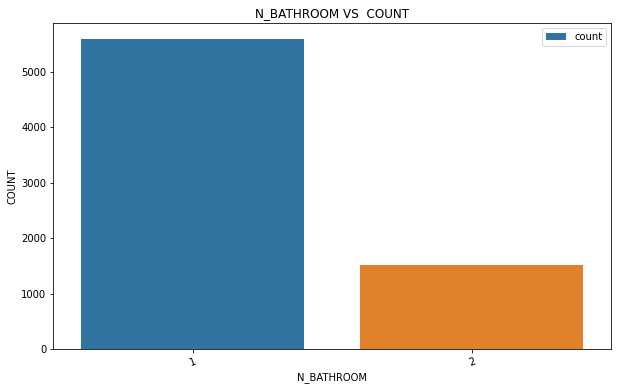

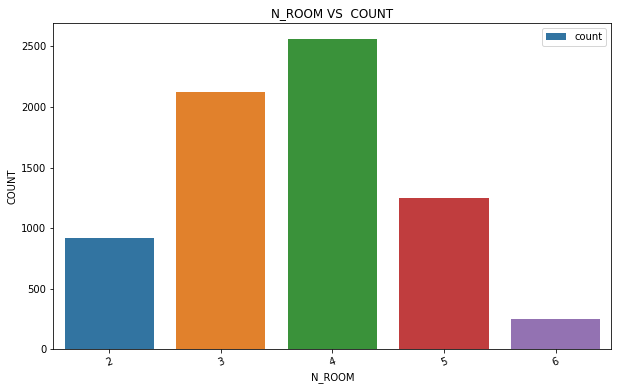

In [87]:
for x in ['N_BEDROOM','N_BATHROOM','N_ROOM']:
  countplot(df1,x)
  print("\n")

#EDA INDIVIDUAL CONTINUOUS FEATURE

In [88]:
def contplot(dframe):
  fig,ax=plt.subplots(1,3)
  fig.set_figwidth(15)
  fig.set_figheight(9)
  ax[0].hist(dframe)
  ax[1].boxplot(dframe)
  ax[2].violinplot(dframe)
  ax[0].set_xlabel("BIN RANGE")
  ax[0].set_ylabel("COUNT")
  ax[1].set_xlabel("VALUES")
  ax[1].set_ylabel("RANGES")
  plt.title(str(dframe.name)+"  PLOT")
  return plt.show()

In [89]:
df1.select_dtypes(include=['int64','float64']).columns

Index(['INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'DATE_BUILD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

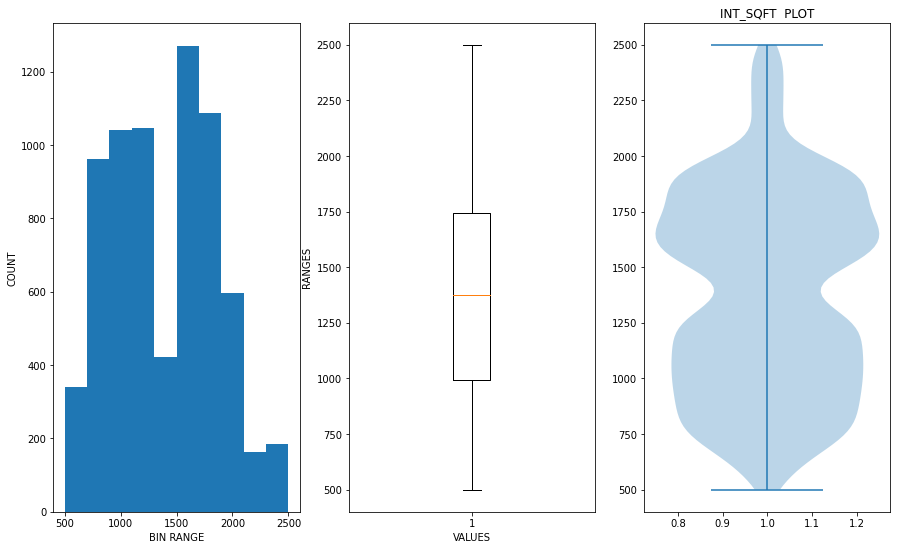

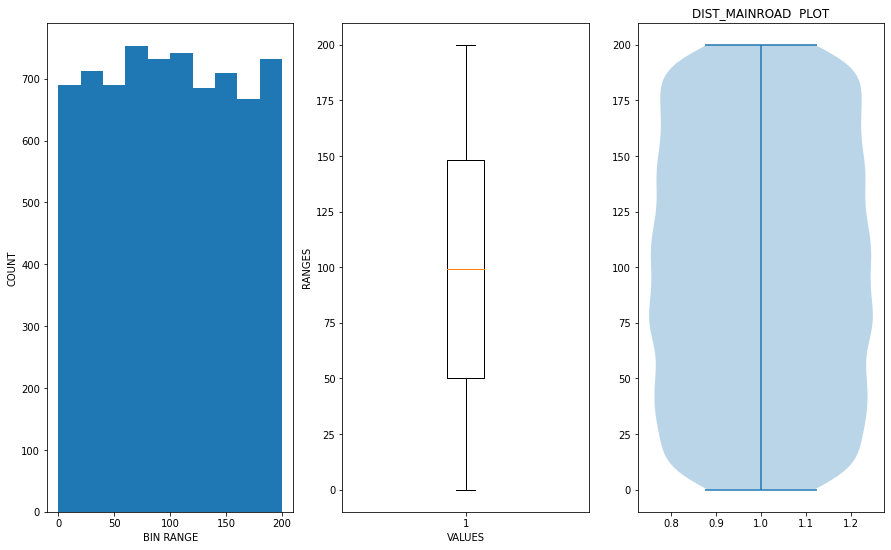

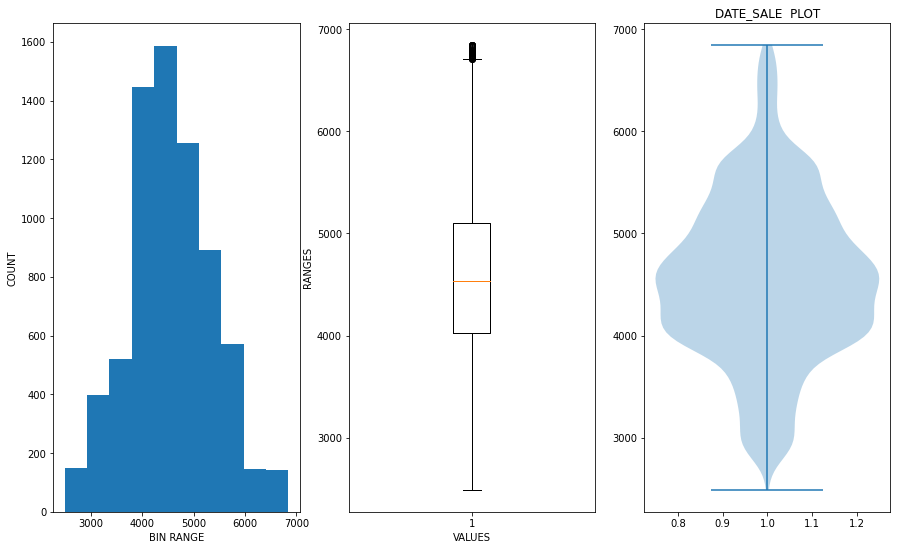

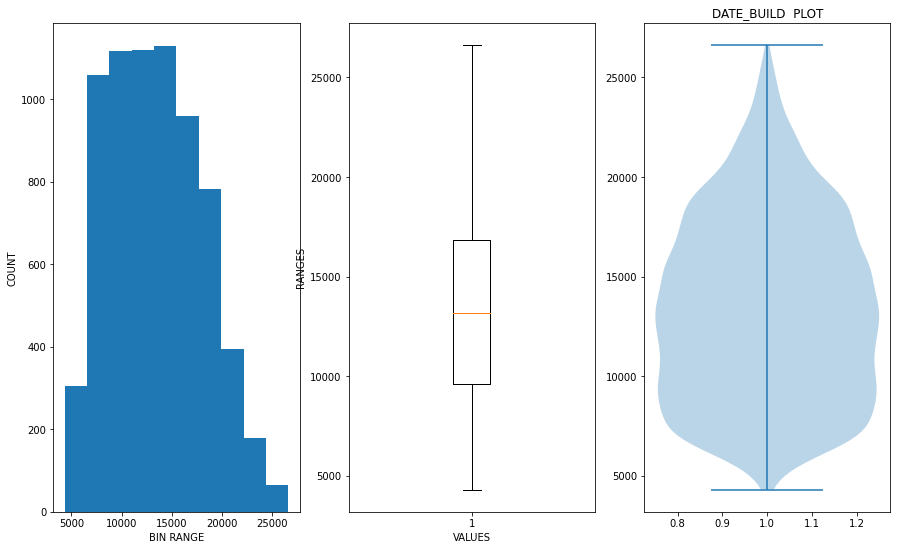

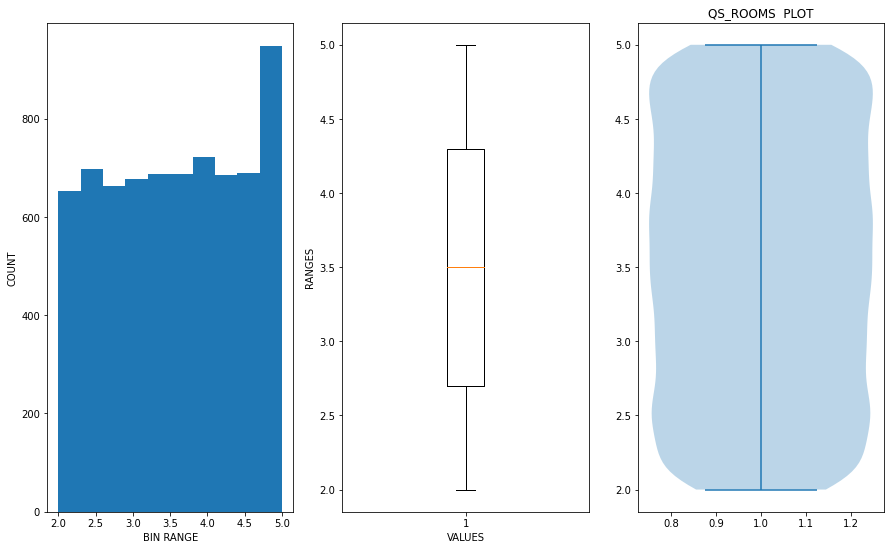

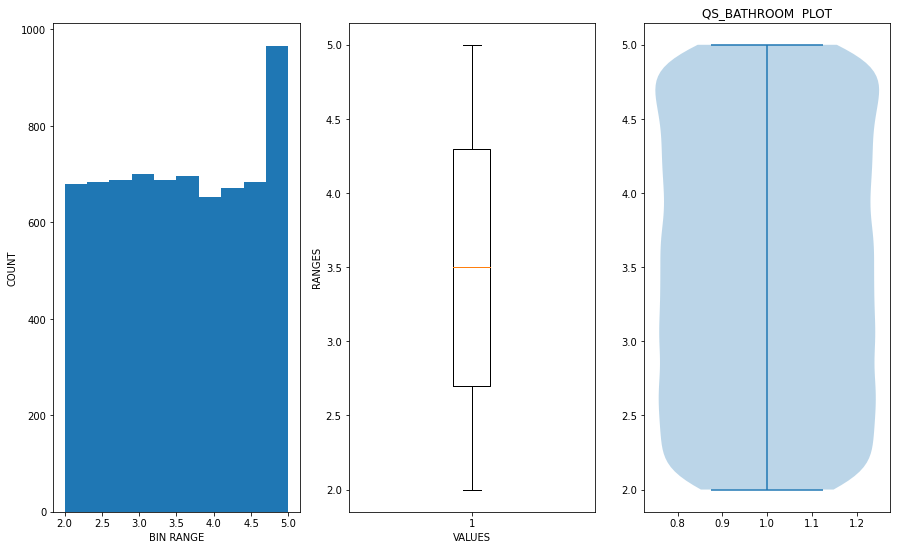

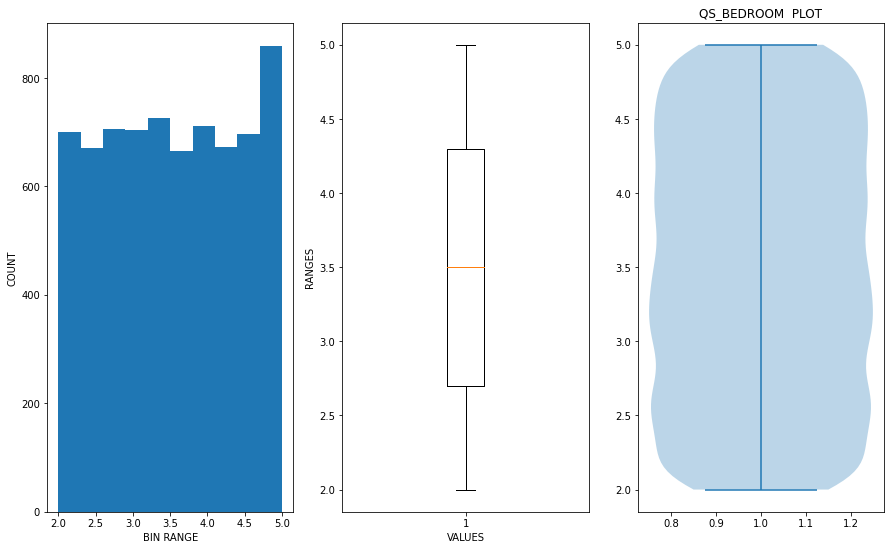

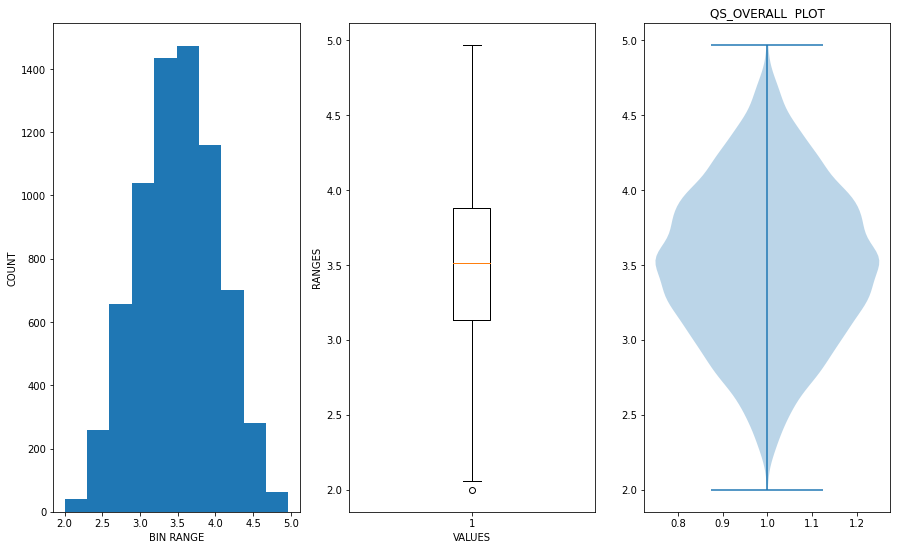

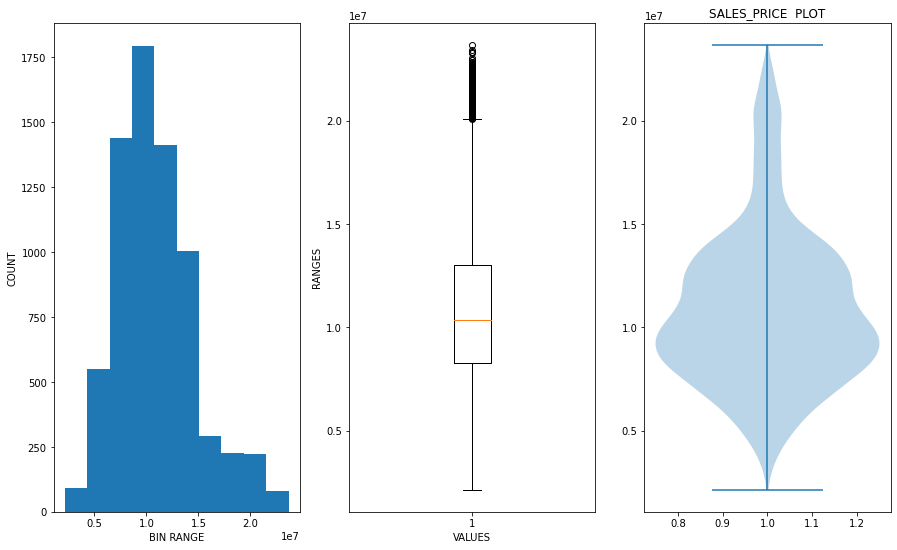

In [90]:
for x in ['INT_SQFT', 'DIST_MAINROAD',"DATE_SALE", 'DATE_BUILD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE']:
  contplot(df1[x])

# EDA-INDIVIDUAL CAT FEATURE VS TARGET LABELS

In [91]:
def sortplot(dframe,col):
  f = plt.figure()
  f.set_figwidth(10)
  f.set_figheight(6)
  # sns.countplot(data=dframe,x=col,label="count")
  sns.barplot(data=df,x=col,y='SALES_PRICE',order=df.groupby(col)["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")[col])
  plt.xlabel(col)
  plt.ylabel("COUNT")
  plt.title(col+" VS  COUNT")
  plt.legend()
  plt.xticks(rotation=20)
  return plt.show()

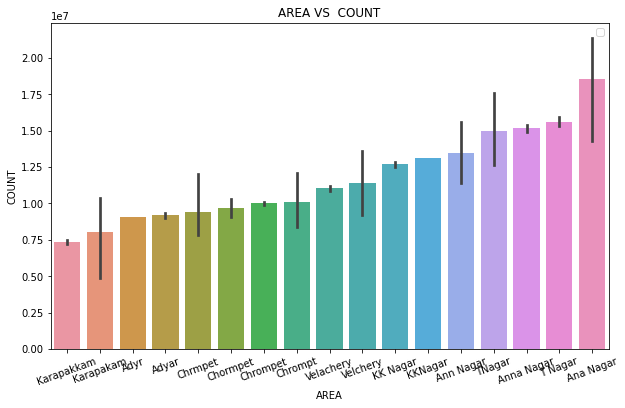

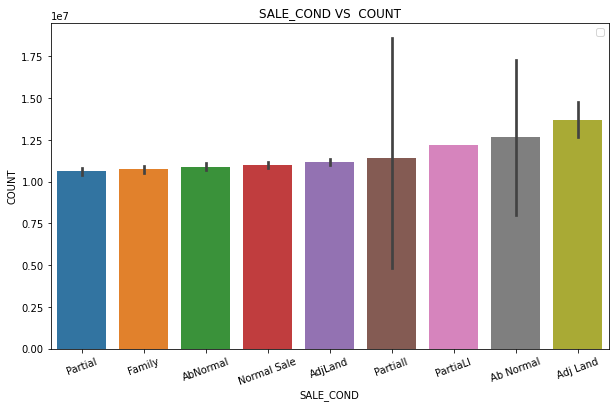

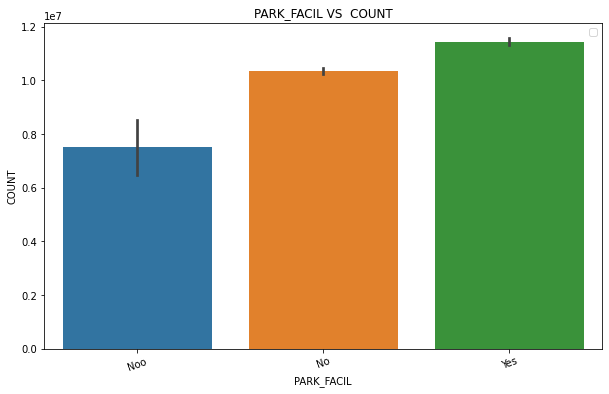

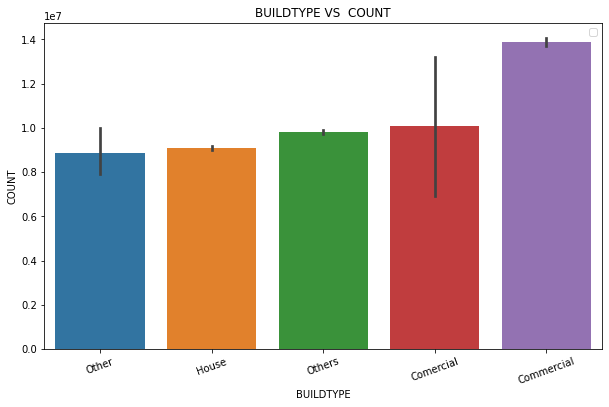

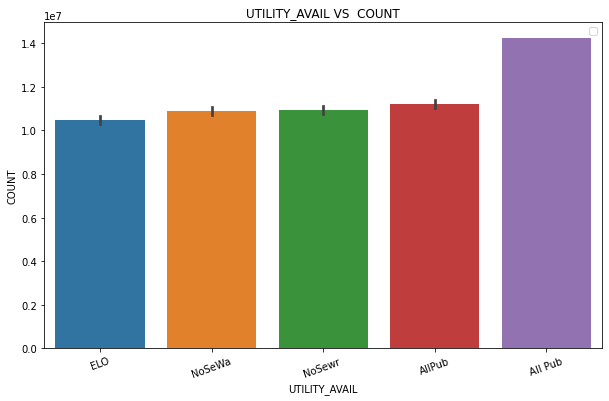

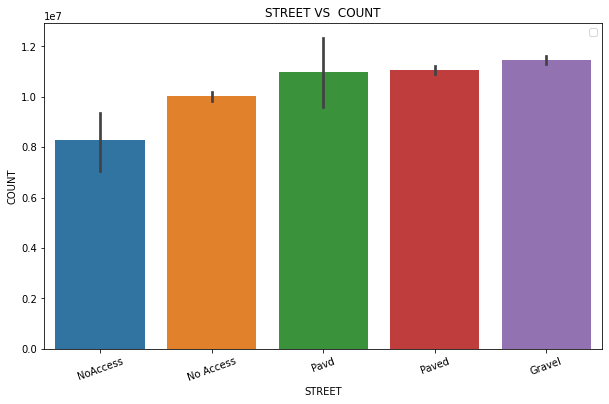

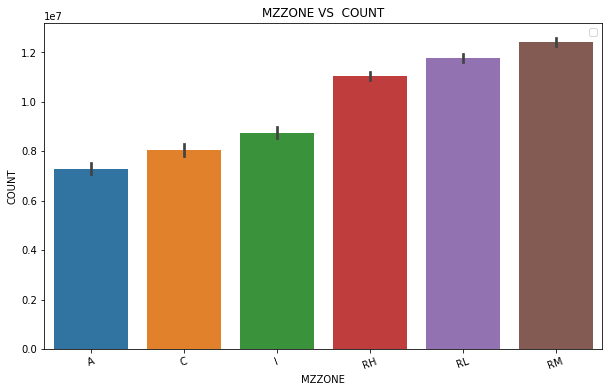

In [92]:
for x in df1.select_dtypes(include=['object']).columns:
   sortplot(df1,x)
   print("\n")

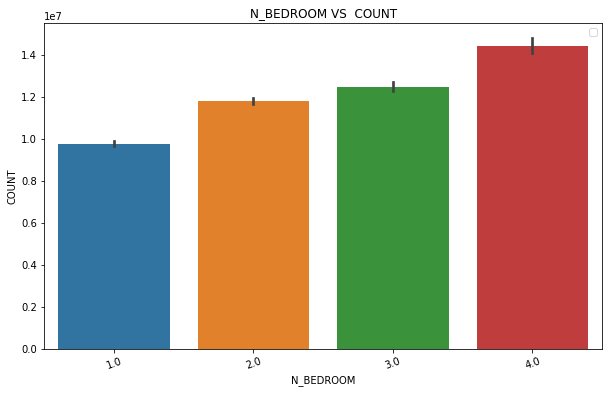

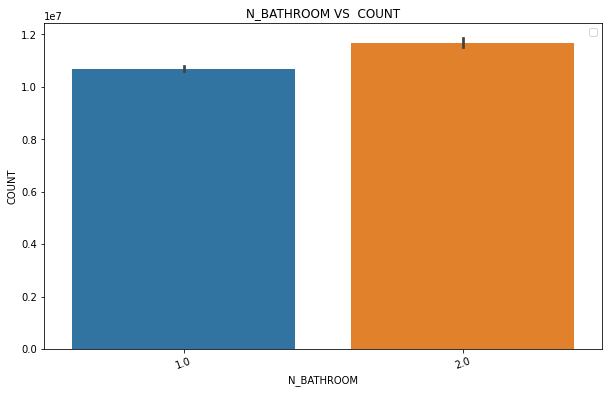

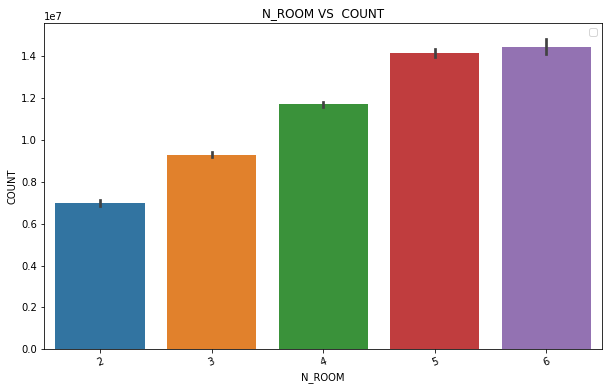

In [93]:
for x in ['N_BEDROOM','N_BATHROOM','N_ROOM']:
  sortplot(df1,x)
  print("\n")

In [94]:
df1.groupby("AREA")["SALES_PRICE"].mean()

AREA
Adyar         9.185668e+06
Anna Nagar    1.516820e+07
Chrompet      1.001381e+07
KK Nagar      1.269623e+07
Karapakkam    7.340100e+06
T Nagar       1.561674e+07
Velachery     1.104735e+07
Name: SALES_PRICE, dtype: float64

In [95]:
df1.groupby(["AREA","BUILDTYPE"])["SALES_PRICE"].mean().reset_index()

,AREA,BUILDTYPE,SALES_PRICE
0,Adyar,Commercial,1.151977e+07
1,Adyar,House,7.973683e+06
2,Adyar,Others,8.209260e+06
3,Anna Nagar,Commercial,1.994195e+07
4,Anna Nagar,House,1.240600e+07
5,Anna Nagar,Others,1.347352e+07
6,Chrompet,Commercial,1.238855e+07
7,Chrompet,House,8.553965e+06
8,Chrompet,Others,9.154363e+06
9,KK Nagar,Commercial,1.596759e+07


In [96]:
df1.groupby(["AREA","BUILDTYPE"])["SALES_PRICE"].std().reset_index()

,AREA,BUILDTYPE,SALES_PRICE
0,Adyar,Commercial,2.112488e+06
1,Adyar,House,1.579419e+06
2,Adyar,Others,1.643272e+06
3,Anna Nagar,Commercial,1.542694e+06
4,Anna Nagar,House,1.172570e+06
5,Anna Nagar,Others,1.182406e+06
6,Chrompet,Commercial,1.584982e+06
7,Chrompet,House,1.124770e+06
8,Chrompet,Others,1.193720e+06
9,KK Nagar,Commercial,2.244229e+06


In [97]:
df1.groupby("AREA")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")

,AREA,SALES_PRICE
4,Karapakkam,7.340100e+06
0,Adyar,9.185668e+06
2,Chrompet,1.001381e+07
6,Velachery,1.104735e+07
3,KK Nagar,1.269623e+07
1,Anna Nagar,1.516820e+07
5,T Nagar,1.561674e+07


In [98]:
df1.groupby("AREA")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["AREA"]

4    Karapakkam
0         Adyar
2      Chrompet
6     Velachery
3      KK Nagar
1    Anna Nagar
5       T Nagar
Name: AREA, dtype: object

# LINEARITY CHECK

In [99]:
sf=df1[['INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'DATE_BUILD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM','QS_OVERALL','SALES_PRICE']]

In [100]:
sf.corr()

,INT_SQFT,DATE_SALE,DIST_MAINROAD,DATE_BUILD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
INT_SQFT,1.000000,0.126754,0.002022,0.009413,0.019850,-0.008337,0.008865,0.014100,0.612125
DATE_SALE,0.126754,1.000000,-0.011988,0.225616,-0.005395,0.000857,-0.002487,0.000282,0.000684
DIST_MAINROAD,0.002022,-0.011988,1.000000,-0.005384,0.002237,-0.029468,0.001554,-0.017231,0.018783
DATE_BUILD,0.009413,0.225616,-0.005384,1.000000,0.018311,0.021397,-0.018023,0.012169,-0.116251
QS_ROOMS,0.019850,-0.005395,0.002237,0.018311,1.000000,0.008828,0.007789,0.516182,0.021967
QS_BATHROOM,-0.008337,0.000857,-0.029468,0.021397,0.008828,1.000000,-0.011745,0.549161,-0.011377
QS_BEDROOM,0.008865,-0.002487,0.001554,-0.018023,0.007789,-0.011745,1.000000,0.628166,0.018804
QS_OVERALL,0.014100,0.000282,-0.017231,0.012169,0.516182,0.549161,0.628166,1.000000,0.020604
SALES_PRICE,0.612125,0.000684,0.018783,-0.116251,0.021967,-0.011377,0.018804,0.020604,1.000000


# DROPPING FEATURES AFTER INFERENCE FROM EDA

In [101]:
df1.drop(["SALE_COND","DATE_SALE","DIST_MAINROAD","QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL"],axis=1,inplace=True)

In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AREA           7109 non-null   object
 1   INT_SQFT       7109 non-null   int64 
 2   N_BEDROOM      7109 non-null   Int64 
 3   N_BATHROOM     7109 non-null   Int64 
 4   N_ROOM         7109 non-null   Int64 
 5   PARK_FACIL     7109 non-null   object
 6   DATE_BUILD     7109 non-null   int64 
 7   BUILDTYPE      7109 non-null   object
 8   UTILITY_AVAIL  7109 non-null   object
 9   STREET         7109 non-null   object
 10  MZZONE         7109 non-null   object
 11  SALES_PRICE    7109 non-null   int64 
dtypes: Int64(3), int64(3), object(6)
memory usage: 1000.9+ KB


In [103]:
df1.to_csv('clean.csv')

In [104]:
df1

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE
0,Karapakkam,1004,1,1,3,Yes,20227,Commercial,All Pub,Paved,A,7600000
1,Anna Nagar,1986,2,1,5,No,9779,Commercial,All Pub,Gravel,RH,21717770
2,Adyar,909,1,1,3,Yes,10985,Commercial,ELO,Gravel,RL,13159200
3,Velachery,1855,3,2,5,No,12614,Others,NoSeWa,Paved,I,9630290
4,Karapakkam,1226,1,1,3,Yes,15693,Others,All Pub,Gravel,C,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,1,1,2,No,22173,Others,ELO,No Access,RM,5353000
7105,Velachery,1897,3,2,5,Yes,9827,Others,NoSeWa,No Access,RH,10818480
7106,Velachery,1614,2,1,4,No,16335,House,NoSeWa,Gravel,I,8351410
7107,Karapakkam,787,1,1,2,Yes,16397,Commercial,ELO,Paved,RL,8507000


# ENCODE

In [105]:
temp = df1

In [106]:
df2 = temp

In [107]:
df2

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE
0,Karapakkam,1004,1,1,3,Yes,20227,Commercial,All Pub,Paved,A,7600000
1,Anna Nagar,1986,2,1,5,No,9779,Commercial,All Pub,Gravel,RH,21717770
2,Adyar,909,1,1,3,Yes,10985,Commercial,ELO,Gravel,RL,13159200
3,Velachery,1855,3,2,5,No,12614,Others,NoSeWa,Paved,I,9630290
4,Karapakkam,1226,1,1,3,Yes,15693,Others,All Pub,Gravel,C,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,1,1,2,No,22173,Others,ELO,No Access,RM,5353000
7105,Velachery,1897,3,2,5,Yes,9827,Others,NoSeWa,No Access,RH,10818480
7106,Velachery,1614,2,1,4,No,16335,House,NoSeWa,Gravel,I,8351410
7107,Karapakkam,787,1,1,2,Yes,16397,Commercial,ELO,Paved,RL,8507000


In [108]:
df2["AREA"] = df2["AREA"].map({'Karapakkam':0, 'Anna Nagar':5, 'Adyar':1, 'Chrompet':2, 'KK Nagar':4,'T Nagar':6, 'Velachery':3})
df2["PARK_FACIL"] = df2["PARK_FACIL"].map({'No':0, 'Yes':1})
# df2["BUILDTYPE"] = df2["BUILDTYPE"].map({'Commercial':2, 'House':0, 'Others':1})
df2["UTILITY_AVAIL"] = df2["UTILITY_AVAIL"].map({'All Pub':2, 'ELO':0,'NoSeWa':1})
# df2["STREET"] = df2["STREET"].map({'Gravel':2, 'No Access':0, 'Paved':1})               
df2["MZZONE"] = df2["MZZONE"].map({'A':0, 'C':1, 'I':2, 'RH':3, 'RL':4, 'RM':5})


df2 = pd.get_dummies(df2,columns = ["STREET"]) 
df2 = pd.get_dummies(df2,columns = ["BUILDTYPE"])

In [109]:
df2.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,MZZONE,SALES_PRICE,STREET_Gravel,STREET_No Access,STREET_Paved,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,1004,1,1,3,1,20227,2,0,7600000,0,0,1,1,0,0
1,5,1986,2,1,5,0,9779,2,3,21717770,1,0,0,1,0,0
2,1,909,1,1,3,1,10985,0,4,13159200,1,0,0,1,0,0
3,3,1855,3,2,5,0,12614,1,2,9630290,0,0,1,0,0,1
4,0,1226,1,1,3,1,15693,2,1,7406250,1,0,0,0,0,1


In [110]:
df2.dtypes

AREA                    int64
INT_SQFT                int64
N_BEDROOM               Int64
N_BATHROOM              Int64
N_ROOM                  Int64
PARK_FACIL              int64
DATE_BUILD              int64
UTILITY_AVAIL           int64
MZZONE                  int64
SALES_PRICE             int64
STREET_Gravel           uint8
STREET_No Access        uint8
STREET_Paved            uint8
BUILDTYPE_Commercial    uint8
BUILDTYPE_House         uint8
BUILDTYPE_Others        uint8
dtype: object

# SPLIT

In [111]:
df2.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'DATE_BUILD', 'UTILITY_AVAIL', 'MZZONE', 'SALES_PRICE', 'STREET_Gravel',
       'STREET_No Access', 'STREET_Paved', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

In [112]:
train=list(df2.columns)
train.remove('SALES_PRICE')

In [113]:
df2['SALES_PRICE']

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7104     5353000
7105    10818480
7106     8351410
7107     8507000
7108     9976480
Name: SALES_PRICE, Length: 7109, dtype: int64

In [130]:
x_train, x_test, y_train, y_test = train_test_split(df2[train].values,
                                                    df2['SALES_PRICE'].values, 
                                                    test_size=0.25,
                                                    random_state=1, 
                                                    shuffle=True, 
                                                    stratify=None)

In [116]:
x_test.shape,x_train.shape,y_train.shape,y_test.shape

((1778, 15), (5331, 15), (5331,), (1778,))

# SCALE

In [117]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

# LINEAR REGRESSION

In [132]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [133]:
regressor.coef_

array([ 5.75808443e+05,  1.40833474e+03, -1.54336606e+06,  2.72016516e+05,
        1.71793664e+06,  1.04093240e+06, -4.74259131e+01,  5.63621876e+04,
        5.82784756e+05,  4.80256788e+05, -4.82220330e+05,  1.96354208e+03,
        2.88056663e+06, -1.77565273e+06, -1.10491390e+06])

In [120]:
len(regressor.coef_)

15

In [122]:
len(df2[train].columns)

15

In [123]:
regressor.intercept_

10882554.99906209

In [124]:
y_pred = regressor.predict(x_test)
y_pred 

array([17115346.15566177,  7131962.22564871,  6173854.0036697 , ...,
       17070135.18522925, 14963630.28746924, 12631237.863438  ])

In [125]:
from sklearn import metrics
print('R2 SCORE:', metrics.r2_score(y_test,y_pred))

R2 SCORE: 0.9229465330229458


In [127]:
pd.DataFrame(index=df2[train].columns,data=regressor.coef_,columns=["coeff"]).sort_values(by = 'coeff',ascending = False)

,coeff
N_ROOM,1.751656e+06
BUILDTYPE_Commercial,1.358836e+06
AREA,1.061071e+06
MZZONE,8.757278e+05
INT_SQFT,6.431864e+05
PARK_FACIL,5.204647e+05
STREET_Gravel,2.210064e+05
N_BATHROOM,1.122718e+05
UTILITY_AVAIL,3.900652e+04
STREET_Paved,-8.105058e+03


## Cross Validation

In [129]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True) #untrained model
cv_results = cross_validate(regressor, df2[train].values, df2['SALES_PRICE'].values, cv=10, scoring = "r2")
cv_results['test_score'].mean()

0.9189361786418644